# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

In [3]:
# Your code here! :)

In [4]:
df = pd.read_csv('GermanCredit.csv')
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [5]:
np.sum(df.isnull().any()) # checking for nans

0

In [6]:
print(df.shape)
print(df.columns)
df['Class'].value_counts()

(1000, 62)
Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDu

Good    700
Bad     300
Name: Class, dtype: int64

In [7]:
# Data imbalance? Let's resample
X = df.drop(columns = ['Class'])
y = df['Class']

In [8]:
rebalance = True

if rebalance:
    from imblearn.combine import SMOTETomek
    smk = SMOTETomek()
    X_res, y_res = smk.fit_resample(X,y)
    print(X_res.shape, y_res.shape)
    y_res.value_counts()
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)



Using TensorFlow backend.


(1222, 61) (1222,)


In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)

In [10]:
model = DecisionTreeClassifier()

In [11]:
tuning = {
    'min_samples_split': range(2, 403, 10),
    'max_features': np.linspace(1, 61, 10).astype(int)
         }
clf = GridSearchCV(model, scoring = 'accuracy', param_grid = tuning, return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.7695906432748537
{'max_features': 41, 'min_samples_split': 92}


In [12]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.79      0.76      0.77       184
        Good       0.77      0.80      0.78       183

    accuracy                           0.78       367
   macro avg       0.78      0.78      0.78       367
weighted avg       0.78      0.78      0.78       367



In [13]:
print(clf)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': array([ 1,  7, 14, 21, 27, 34, 41,

### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [14]:
# pip install dtreeviz

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [15]:
import dtreeviz

In [16]:
print(X.columns)
print(clf.best_params_)
model = DecisionTreeClassifier(max_features = 54, min_samples_split = 32)
model.fit(X_res, y_res)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'Emp

In [17]:
#viz = dtreeviz(model, X, y, target_name='Class',feature_names = X.columns)
#viz.view()

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier()
# max_features = 54, min_samples_split = 32
tuning = {
    'n_estimators': np.arange(100, 600, 25).astype(int),
    'min_samples_split': [32],
    'max_features': [54],
         }
clf = GridSearchCV(model, scoring = 'accuracy', param_grid = tuning, return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)



0.8116959064327485
{'max_features': 54, 'min_samples_split': 32, 'n_estimators': 100}


In [20]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.84      0.82      0.83       184
        Good       0.82      0.85      0.84       183

    accuracy                           0.83       367
   macro avg       0.83      0.83      0.83       367
weighted avg       0.83      0.83      0.83       367



In [21]:
model = RandomForestClassifier(n_estimators = 100, max_features = 54, min_samples_split = 32)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=54,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:
1. feature 12 (0.194231)
2. feature 1 (0.150436)
3. feature 0 (0.125172)
4. feature 4 (0.074173)
5. feature 9 (0.030492)
6. feature 14 (0.021344)
7. feature 29 (0.020999)
8. feature 2 (0.020508)
9. feature 33 (0.018709)
10. feature 18 (0.018471)
11. feature 13 (0.016469)
12. feature 3 (0.016092)
13. feature 51 (0.015839)
14. feature 53 (0.015377)
15. feature 17 (0.013459)
16. feature 34 (0.011878)
17. feature 38 (0.011589)
18. feature 50 (0.011164)
19. feature 44 (0.010558)
20. feature 46 (0.010370)
21. feature 47 (0.010349)
22. feature 11 (0.010291)
23. feature 24 (0.010247)
24. feature 5 (0.010028)
25. feature 16 (0.009121)
26. feature 20 (0.007513)
27. feature 19 (0.007495)
28. feature 7 (0.007389)
29. feature 60 (0.007320)
30. feature 49 (0.006469)
31. feature 45 (0.006226)
32. feature 27 (0.006095)
33. feature 55 (0.006052)
34. feature 41 (0.005770)
35. feature 39 (0.005578)
36. feature 48 (0.005427)
37. feature 23 (0.005133)
38. feature 10 (0.005024)
39. feature 

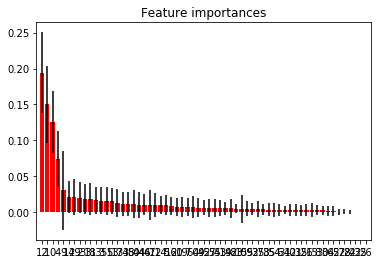

In [22]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [23]:
print(X.columns[indices])


Index(['CheckingAccountStatus.none', 'Amount', 'Duration', 'Age',
       'CheckingAccountStatus.lt.0', 'CreditHistory.ThisBank.AllPaid',
       'SavingsAccountBonds.lt.100', 'InstallmentRatePercentage',
       'SavingsAccountBonds.Unknown', 'Purpose.NewCar',
       'CreditHistory.NoCredit.AllPaid', 'ResidenceDuration',
       'OtherInstallmentPlans.Bank', 'OtherInstallmentPlans.None',
       'CreditHistory.Critical', 'EmploymentDuration.lt.1',
       'EmploymentDuration.Unemployed', 'Property.Unknown',
       'OtherDebtorsGuarantors.None', 'OtherDebtorsGuarantors.Guarantor',
       'Property.RealEstate', 'CheckingAccountStatus.gt.200',
       'Purpose.Education', 'NumberExistingCredits', 'CreditHistory.Delay',
       'Purpose.Furniture.Equipment', 'Purpose.UsedCar', 'Telephone',
       'Job.Management.SelfEmp.HighlyQualified', 'Property.CarOther',
       'OtherDebtorsGuarantors.CoApplicant', 'Purpose.Business', 'Housing.Own',
       'Personal.Male.Single', 'Personal.Male.Divorced.Seper

In [24]:
print(importances)

[0.12517201 0.15043617 0.02050809 0.01609199 0.07417261 0.01002787
 0.00349156 0.00738941 0.00291801 0.03049189 0.00502378 0.01029125
 0.19423142 0.01646932 0.02134402 0.0029514  0.00912091 0.01345899
 0.01847122 0.00749523 0.00751318 0.00320444 0.00051133 0.00513313
 0.01024653 0.         0.         0.00609469 0.00071611 0.02099854
 0.00290667 0.00345323 0.00317252 0.01870888 0.01187801 0.00391832
 0.00251822 0.00475361 0.01158885 0.00557757 0.00320526 0.00576953
 0.00193991 0.         0.01055784 0.00622584 0.01037045 0.01034938
 0.00542669 0.0064689  0.01116381 0.01583921 0.00482218 0.01537682
 0.00364336 0.00605235 0.00301691 0.00091638 0.00408273 0.00500175
 0.00731969]


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [25]:
#! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1b4320561c8>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1b4320c8ec8>})

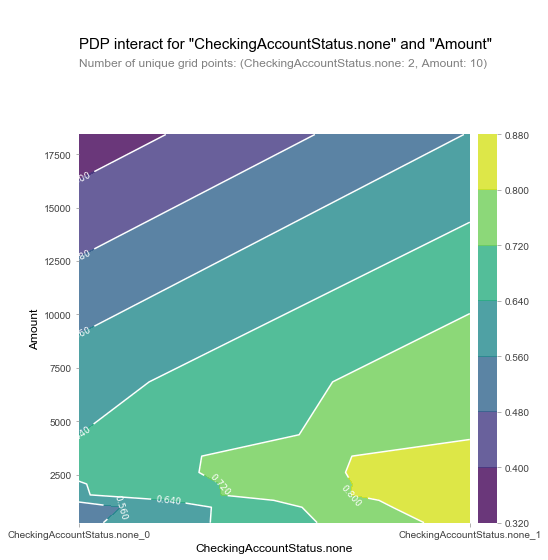

In [26]:
import pdpbox
from pdpbox import pdp

pdp_1_2 = pdp.pdp_interact(model, X, model_features = X.columns,
                           features=['CheckingAccountStatus.none','Amount'])
pdp.pdp_interact_plot(pdp_1_2, feature_names = ['CheckingAccountStatus.none','Amount'])

Index(['CheckingAccountStatus.none', 'Amount', 'Duration', 'Age',
       'CheckingAccountStatus.lt.0', 'CreditHistory.ThisBank.AllPaid',
       'SavingsAccountBonds.lt.100', 'InstallmentRatePercentage',
       'SavingsAccountBonds.Unknown'],
      dtype='object')


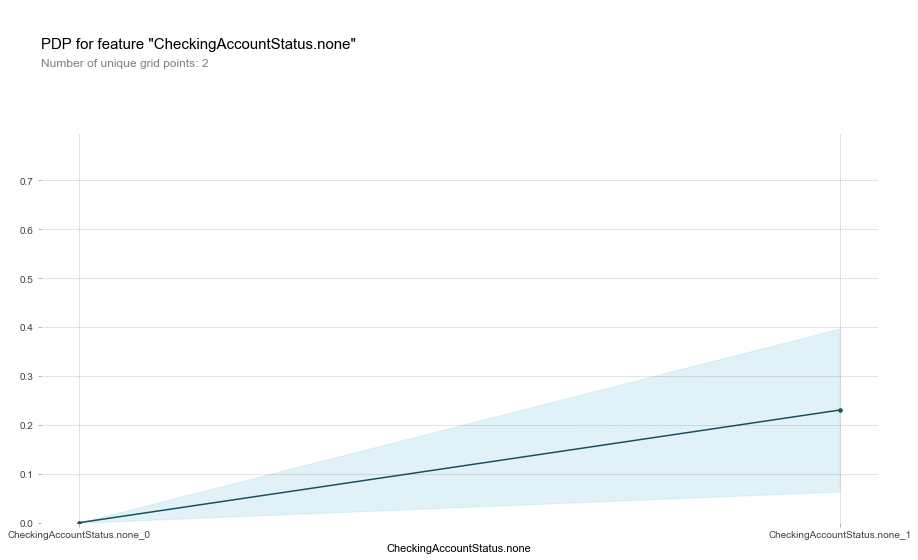

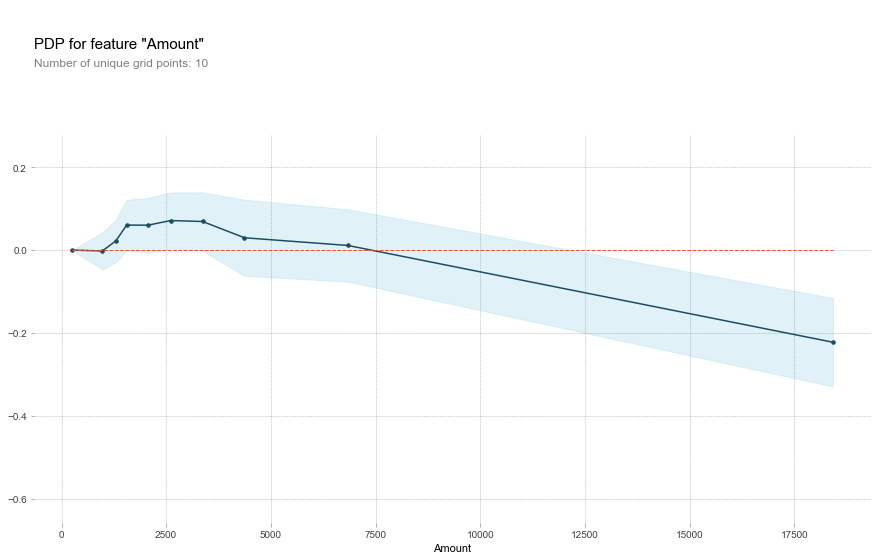

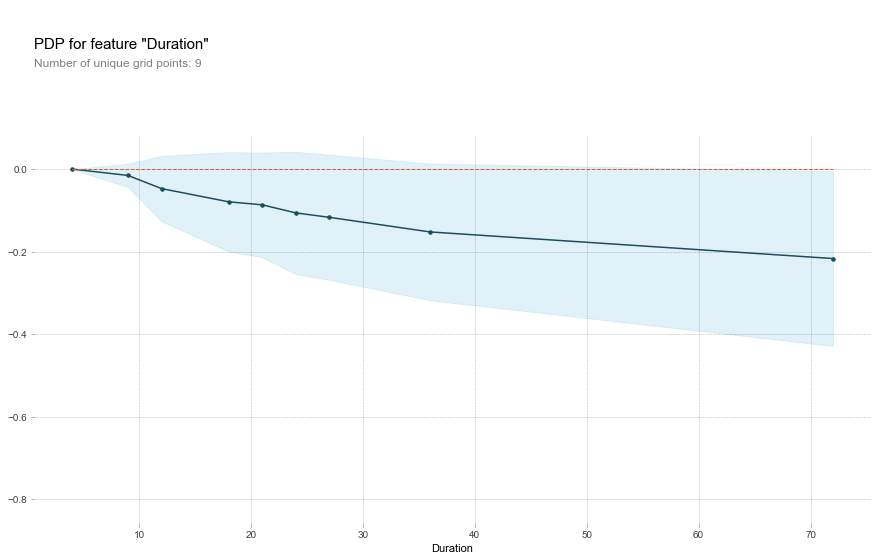

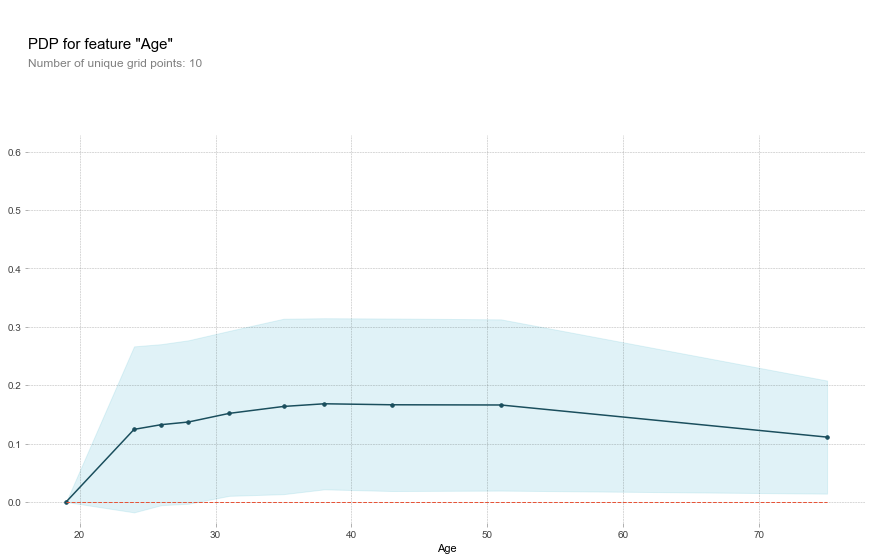

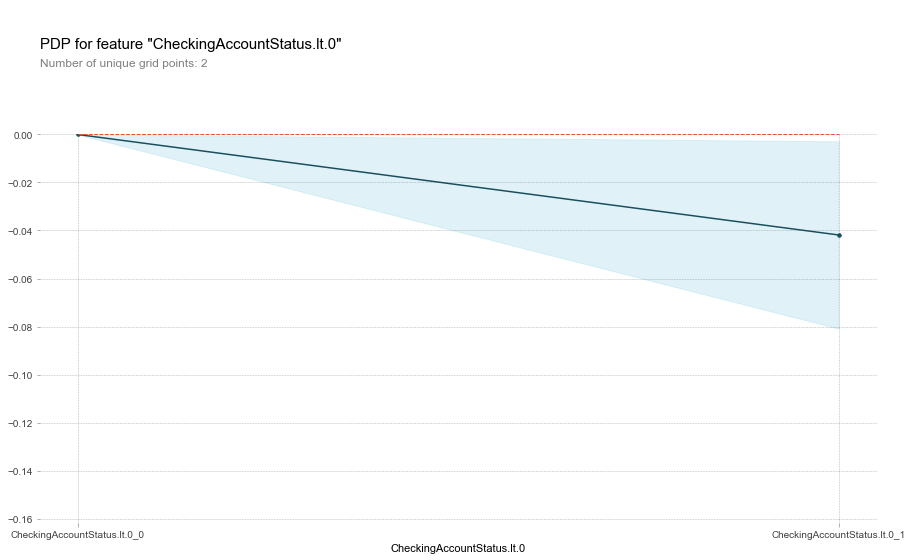

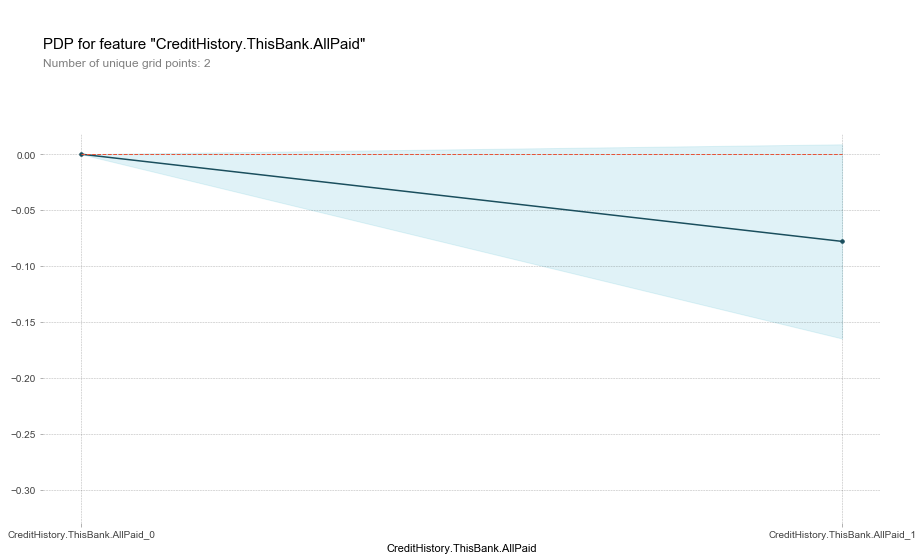

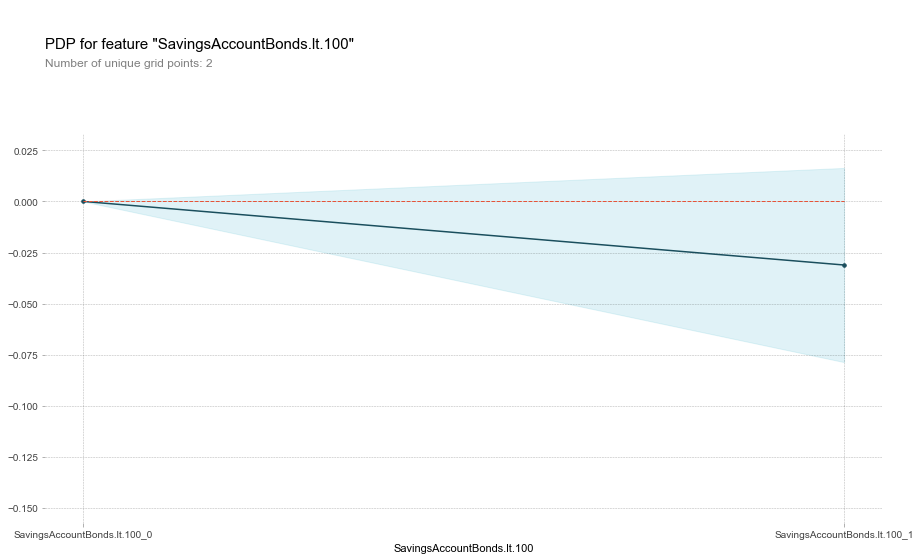

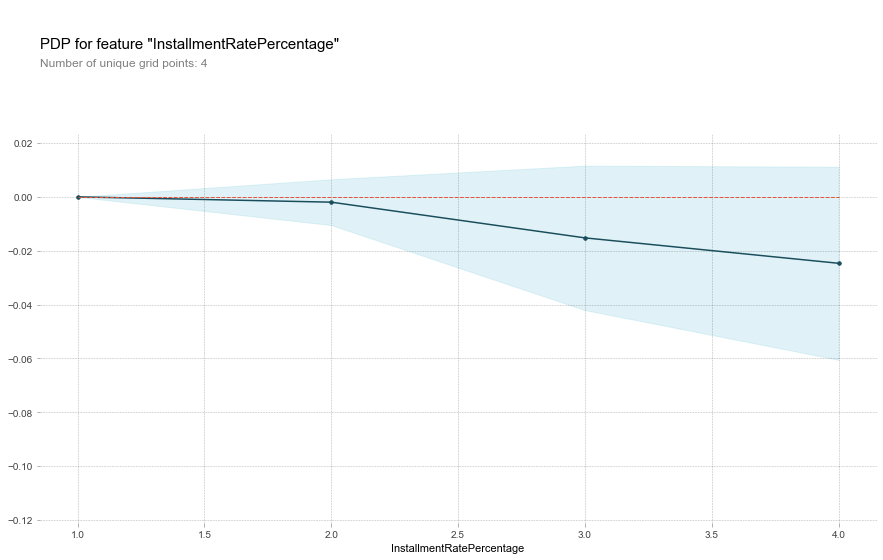

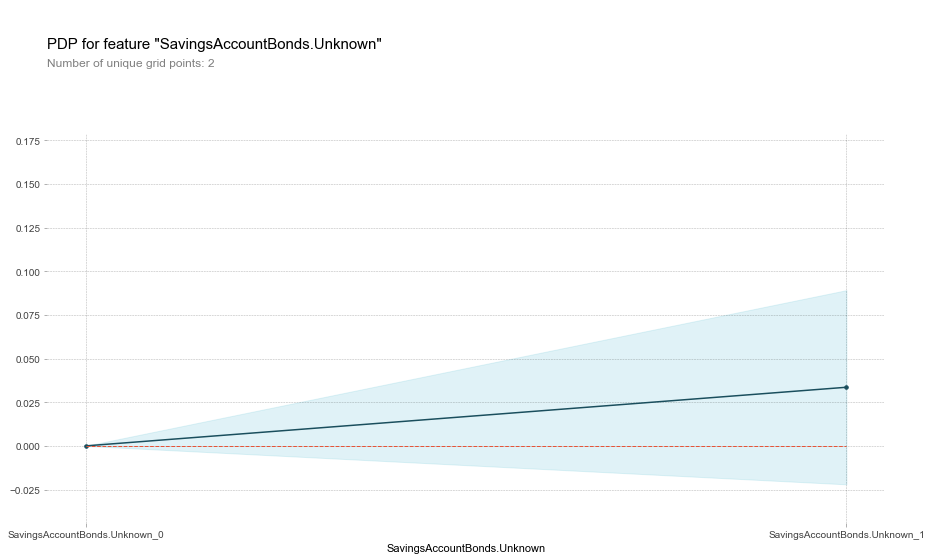

In [27]:
top_features = X.columns[indices[:9]]
print(top_features)

for p, feature in enumerate(top_features):
    pdp_single = pdp.pdp_isolate(model=model,
                              dataset=X,
                              model_features=X.columns,
                              feature=feature)
    pdp.pdp_plot(pdp_isolate_out=pdp_single, feature_name=feature)


## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [28]:
# conda install -c anaconda py-xgboost

In [29]:
# conda install -c conda-forge catboost

In [30]:
# conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [31]:
from xgboost import XGBClassifier


In [34]:

# 'max_depth':6

model = XGBClassifier()
# max_features = 54, min_samples_split = 32
tuning = {
    'n_estimators': np.arange(100, 600, 25).astype(int),
    'min_child_weight': [8, 16, 32],
    'max_depth': [4, 6, 10, 12],
         }
clf = GridSearchCV(model, scoring = 'accuracy', param_grid = tuning, return_train_score=True)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

0.8163742690058479
{'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 200}
              precision    recall  f1-score   support

         Bad       0.88      0.84      0.86       184
        Good       0.85      0.88      0.86       183

    accuracy                           0.86       367
   macro avg       0.86      0.86      0.86       367
weighted avg       0.86      0.86      0.86       367



In [35]:
import catboost as cb

In [36]:
model = cb.CatBoostClassifier()

In [42]:
'''
tuning = {
    'depth': [8, 16, 32],
         }
clf = GridSearchCV(model, scoring = 'accuracy', param_grid = tuning, return_train_score=True)
'''
model.fit(X_train, y_train)


Learning rate set to 0.009636
0:	learn: 0.6884640	total: 3.9ms	remaining: 3.89s
1:	learn: 0.6820692	total: 6.52ms	remaining: 3.25s
2:	learn: 0.6773934	total: 9.03ms	remaining: 3s
3:	learn: 0.6723518	total: 11.6ms	remaining: 2.89s
4:	learn: 0.6682304	total: 14.4ms	remaining: 2.86s
5:	learn: 0.6641487	total: 16.8ms	remaining: 2.79s
6:	learn: 0.6605134	total: 19.4ms	remaining: 2.75s
7:	learn: 0.6566133	total: 22.1ms	remaining: 2.73s
8:	learn: 0.6527575	total: 24.5ms	remaining: 2.7s
9:	learn: 0.6486462	total: 27ms	remaining: 2.67s
10:	learn: 0.6443162	total: 29.8ms	remaining: 2.68s
11:	learn: 0.6401940	total: 32.5ms	remaining: 2.67s
12:	learn: 0.6352533	total: 34.9ms	remaining: 2.65s
13:	learn: 0.6319801	total: 37.6ms	remaining: 2.65s
14:	learn: 0.6276587	total: 40.2ms	remaining: 2.64s
15:	learn: 0.6243364	total: 42.6ms	remaining: 2.62s
16:	learn: 0.6207501	total: 45.2ms	remaining: 2.61s
17:	learn: 0.6187720	total: 46.5ms	remaining: 2.54s
18:	learn: 0.6161667	total: 49ms	remaining: 2.53s
1

189:	learn: 0.3677882	total: 510ms	remaining: 2.17s
190:	learn: 0.3673271	total: 513ms	remaining: 2.17s
191:	learn: 0.3658429	total: 516ms	remaining: 2.17s
192:	learn: 0.3653177	total: 519ms	remaining: 2.17s
193:	learn: 0.3645694	total: 522ms	remaining: 2.17s
194:	learn: 0.3639617	total: 526ms	remaining: 2.17s
195:	learn: 0.3634799	total: 528ms	remaining: 2.17s
196:	learn: 0.3629003	total: 531ms	remaining: 2.17s
197:	learn: 0.3621112	total: 534ms	remaining: 2.16s
198:	learn: 0.3613581	total: 537ms	remaining: 2.16s
199:	learn: 0.3606433	total: 540ms	remaining: 2.16s
200:	learn: 0.3598243	total: 542ms	remaining: 2.15s
201:	learn: 0.3593030	total: 545ms	remaining: 2.15s
202:	learn: 0.3586147	total: 549ms	remaining: 2.16s
203:	learn: 0.3579066	total: 554ms	remaining: 2.16s
204:	learn: 0.3573797	total: 557ms	remaining: 2.16s
205:	learn: 0.3566874	total: 560ms	remaining: 2.16s
206:	learn: 0.3561596	total: 563ms	remaining: 2.16s
207:	learn: 0.3555927	total: 566ms	remaining: 2.15s
208:	learn: 

377:	learn: 0.2771812	total: 1.02s	remaining: 1.68s
378:	learn: 0.2768382	total: 1.03s	remaining: 1.68s
379:	learn: 0.2764083	total: 1.03s	remaining: 1.68s
380:	learn: 0.2760815	total: 1.03s	remaining: 1.68s
381:	learn: 0.2758430	total: 1.03s	remaining: 1.68s
382:	learn: 0.2754241	total: 1.04s	remaining: 1.67s
383:	learn: 0.2750799	total: 1.04s	remaining: 1.67s
384:	learn: 0.2746747	total: 1.04s	remaining: 1.67s
385:	learn: 0.2742225	total: 1.05s	remaining: 1.67s
386:	learn: 0.2739395	total: 1.05s	remaining: 1.66s
387:	learn: 0.2734410	total: 1.05s	remaining: 1.66s
388:	learn: 0.2730646	total: 1.05s	remaining: 1.66s
389:	learn: 0.2727418	total: 1.06s	remaining: 1.65s
390:	learn: 0.2725377	total: 1.06s	remaining: 1.65s
391:	learn: 0.2721546	total: 1.06s	remaining: 1.65s
392:	learn: 0.2718002	total: 1.07s	remaining: 1.65s
393:	learn: 0.2714806	total: 1.07s	remaining: 1.65s
394:	learn: 0.2711289	total: 1.07s	remaining: 1.64s
395:	learn: 0.2707048	total: 1.08s	remaining: 1.64s
396:	learn: 

563:	learn: 0.2194529	total: 1.54s	remaining: 1.19s
564:	learn: 0.2190046	total: 1.54s	remaining: 1.19s
565:	learn: 0.2188687	total: 1.55s	remaining: 1.19s
566:	learn: 0.2186560	total: 1.55s	remaining: 1.18s
567:	learn: 0.2183220	total: 1.55s	remaining: 1.18s
568:	learn: 0.2181162	total: 1.56s	remaining: 1.18s
569:	learn: 0.2178302	total: 1.56s	remaining: 1.18s
570:	learn: 0.2173830	total: 1.56s	remaining: 1.18s
571:	learn: 0.2172148	total: 1.57s	remaining: 1.17s
572:	learn: 0.2170652	total: 1.57s	remaining: 1.17s
573:	learn: 0.2168788	total: 1.57s	remaining: 1.17s
574:	learn: 0.2166870	total: 1.57s	remaining: 1.16s
575:	learn: 0.2163695	total: 1.58s	remaining: 1.16s
576:	learn: 0.2161725	total: 1.58s	remaining: 1.16s
577:	learn: 0.2158982	total: 1.58s	remaining: 1.16s
578:	learn: 0.2157920	total: 1.58s	remaining: 1.15s
579:	learn: 0.2155461	total: 1.59s	remaining: 1.15s
580:	learn: 0.2153321	total: 1.59s	remaining: 1.15s
581:	learn: 0.2150169	total: 1.59s	remaining: 1.14s
582:	learn: 

754:	learn: 0.1747741	total: 2.06s	remaining: 667ms
755:	learn: 0.1746248	total: 2.06s	remaining: 664ms
756:	learn: 0.1744332	total: 2.06s	remaining: 662ms
757:	learn: 0.1742754	total: 2.06s	remaining: 659ms
758:	learn: 0.1741152	total: 2.07s	remaining: 656ms
759:	learn: 0.1739354	total: 2.07s	remaining: 653ms
760:	learn: 0.1737652	total: 2.07s	remaining: 651ms
761:	learn: 0.1735525	total: 2.08s	remaining: 648ms
762:	learn: 0.1733671	total: 2.08s	remaining: 646ms
763:	learn: 0.1731257	total: 2.08s	remaining: 643ms
764:	learn: 0.1728761	total: 2.08s	remaining: 640ms
765:	learn: 0.1726845	total: 2.09s	remaining: 638ms
766:	learn: 0.1724523	total: 2.09s	remaining: 635ms
767:	learn: 0.1722516	total: 2.09s	remaining: 632ms
768:	learn: 0.1719982	total: 2.1s	remaining: 629ms
769:	learn: 0.1718051	total: 2.1s	remaining: 627ms
770:	learn: 0.1716101	total: 2.1s	remaining: 624ms
771:	learn: 0.1713794	total: 2.1s	remaining: 621ms
772:	learn: 0.1711216	total: 2.11s	remaining: 619ms
773:	learn: 0.17

933:	learn: 0.1422253	total: 2.57s	remaining: 181ms
934:	learn: 0.1421255	total: 2.57s	remaining: 179ms
935:	learn: 0.1419586	total: 2.57s	remaining: 176ms
936:	learn: 0.1417027	total: 2.58s	remaining: 173ms
937:	learn: 0.1413556	total: 2.58s	remaining: 171ms
938:	learn: 0.1411480	total: 2.58s	remaining: 168ms
939:	learn: 0.1409924	total: 2.58s	remaining: 165ms
940:	learn: 0.1407999	total: 2.59s	remaining: 162ms
941:	learn: 0.1406626	total: 2.59s	remaining: 160ms
942:	learn: 0.1406244	total: 2.59s	remaining: 157ms
943:	learn: 0.1404519	total: 2.6s	remaining: 154ms
944:	learn: 0.1403724	total: 2.6s	remaining: 151ms
945:	learn: 0.1401370	total: 2.6s	remaining: 149ms
946:	learn: 0.1399874	total: 2.61s	remaining: 146ms
947:	learn: 0.1397279	total: 2.61s	remaining: 143ms
948:	learn: 0.1395584	total: 2.61s	remaining: 140ms
949:	learn: 0.1393642	total: 2.62s	remaining: 138ms
950:	learn: 0.1392512	total: 2.62s	remaining: 135ms
951:	learn: 0.1391381	total: 2.62s	remaining: 132ms
952:	learn: 0.1

In [44]:
#print(model.best_score_)
#print(model.best_params_)

y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.84      0.84      0.84       184
        Good       0.84      0.84      0.84       183

    accuracy                           0.84       367
   macro avg       0.84      0.84      0.84       367
weighted avg       0.84      0.84      0.84       367

